# Introduction to Data Visualization with Matplotlib

Visualizing data in graphs and figures exposes the underlying patterns in the data and provides insight. Good visualizations also help you communicate your data to others and are useful to data analysts and other consumers of the data.

In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [102]:
# Import data
seattle_weather = pd.read_csv('../data/seattle_weather.csv')
austin_weather = pd.read_csv('../data/seattle_weather.csv')

# 1. Inroduction to Matplotlib
Intoduction to data visualisation with Matplotlib

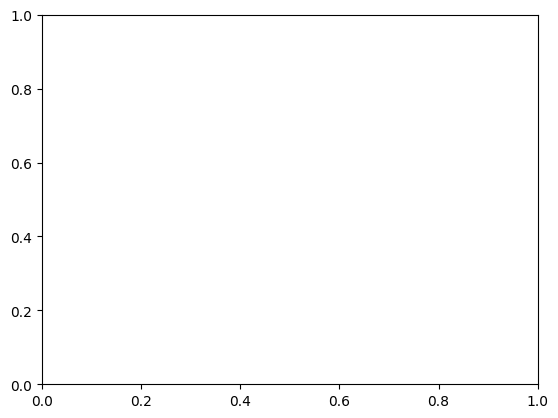

In [103]:
fig, ax = plt.subplots()
plt.show()

## Customizing the plot

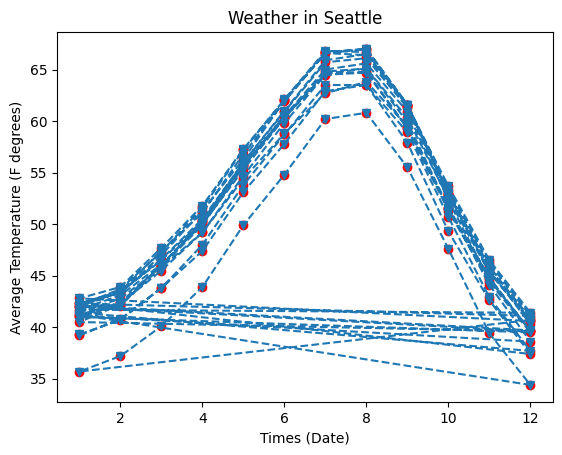

In [104]:
fig, ax = plt.subplots()
ax.plot(seattle_weather['DATE'], seattle_weather['MLY-TAVG-NORMAL'], marker='o', color='r', linestyle='None')
ax.plot(austin_weather['DATE'], austin_weather['MLY-TAVG-NORMAL'], marker='v', linestyle='--')

ax.set_xlabel('Times (Date)')
ax.set_ylabel('Average Temperature (F degrees)')
ax.set_title('Weather in Seattle')

plt.show()

## Small multiples

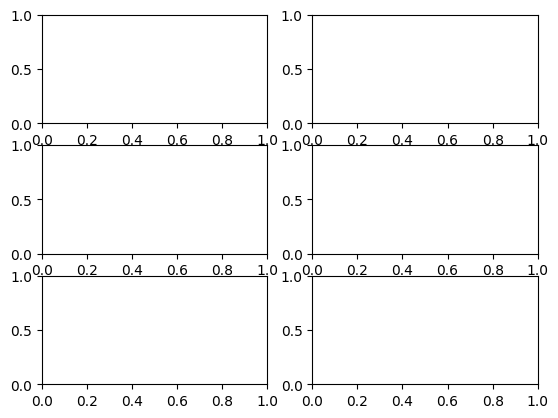

In [105]:
fig, ax = plt.subplots(3,2)
plt.show()

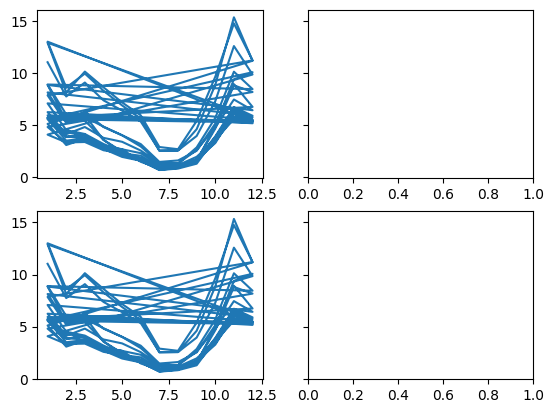

In [106]:
fig, ax = plt.subplots(2,2, sharey=True)
ax[0,0].plot(seattle_weather['DATE'], seattle_weather['MLY-PRCP-NORMAL'])
ax[1,0].plot(austin_weather['DATE'], austin_weather['MLY-PRCP-NORMAL'])
plt.show()

# 2. Plotting time-series
Plotting time-series data

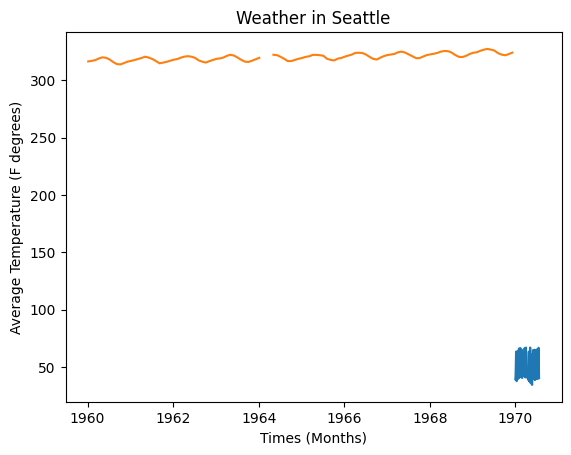

In [107]:
climate_change = pd.read_csv('../data/climate_change.csv', parse_dates=['date'], index_col='date')
sixties = climate_change['1960-01-01':'1969-12-31']

fig, ax = plt.subplots()

ax.plot(seattle_weather.index, seattle_weather['MLY-TAVG-NORMAL'])
ax.plot(sixties.index, sixties['co2'])

ax.set_xlabel('Times (Months)')
ax.set_ylabel('Average Temperature (F degrees)')
ax.set_title('Weather in Seattle')

plt.show()

## Plotting time-series with different variables

In [108]:
def plot_timeseries(axes, x,y , color, xlabel, ylabel):
    axes.plot(x,y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)
    axes.tick_params('y', colors=color)

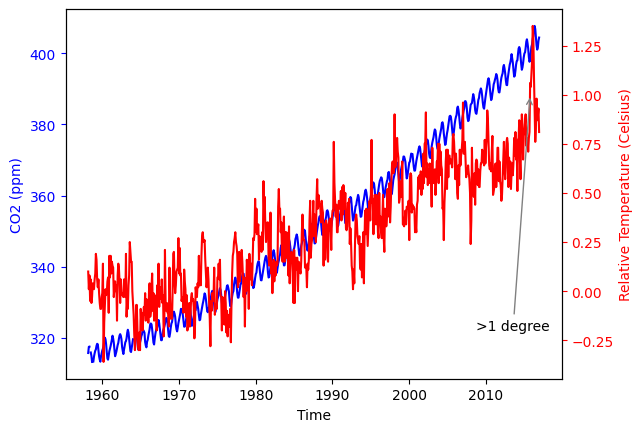

In [109]:
# TO ADD DIFFERENT SCALES
fig, ax = plt.subplots()
plot_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', 'Time', 'CO2 (ppm)')

ax2 = ax.twinx()
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', 'Time', 'Relative Temperature (Celsius)')

# TO ADD A SPECIFIC POINT
ax2.annotate('>1 degree', xy=(pd.Timestamp('2015-10-06'), 1), xytext=(pd.Timestamp('2008-10-06'), -0.2), arrowprops={"arrowstyle": "->", "color": "gray"})

plt.show()

# 3. Quantitative comparisons and statistical visualizations
Quantitative comparisons: bar-charts

C:\Users\theki\AppData\Local\Temp\ipykernel_25344\319346015.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


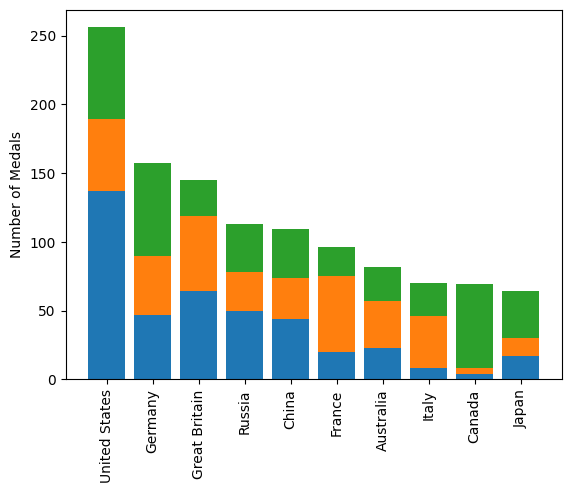

In [110]:
medals = pd.read_csv('../data/medals_by_country_2016.csv', index_col=0)

fig, ax= plt.subplots()

ax.bar(medals.index, medals['Gold'])
ax.bar(medals.index, medals['Silver'], bottom=medals['Gold'])
ax.bar(medals.index, medals['Bronze'], bottom=medals['Gold'] + medals['Silver'])

ax.set_xticklabels(medals.index, rotation=90)
ax.set_ylabel("Number of Medals")

plt.show()

## Quantitative comparisons: histograms

In [111]:
# ax.hist(mens_rowing["Height"], label="Rowing", bins=5)
# ax.hist(mens_gymnastic["Height"], label="Gymnastics", bins=5)

# ax.set_xlabel("Height (cm)")
# ax.set_ylabel("# of observations")

# ax.legend()
# plt.show()

## Statistical plotting

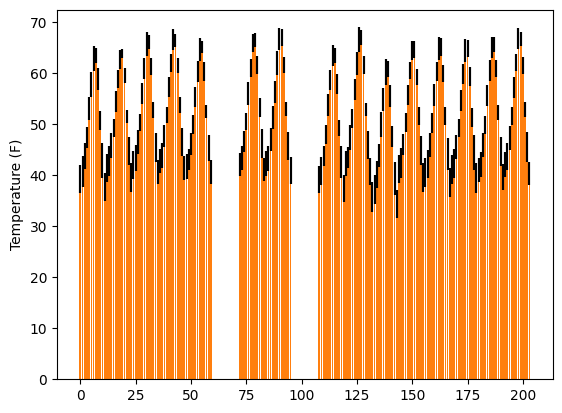

In [112]:
# Adding error bars to bar charts
fig, ax = plt.subplots()

ax.bar(seattle_weather.index, seattle_weather['MLY-TAVG-NORMAL'], yerr=seattle_weather['MLY-TAVG-STDDEV'])
ax.bar(austin_weather.index, austin_weather['MLY-TAVG-NORMAL'], yerr=austin_weather['MLY-TAVG-STDDEV'])

ax.set_ylabel('Temperature (F)')

plt.show()

## Quantitative comparisons: scatter plots

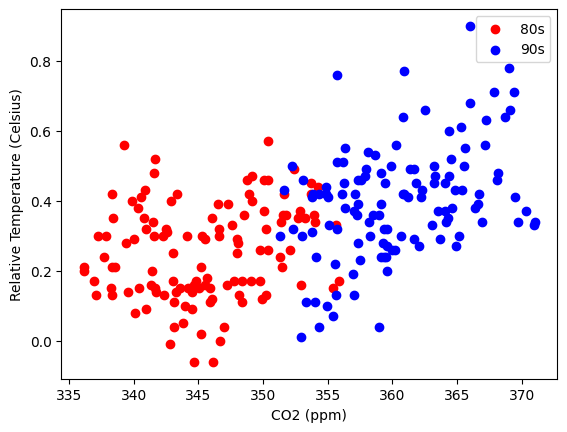

In [113]:
eighties = climate_change['1980-01-01':'1989-12-31']
nineties = climate_change['1990-01-01':'1999-12-31']

fig, ax = plt.subplots()
ax.scatter(eighties['co2'], eighties['relative_temp'], color='red', label='80s')
ax.scatter(nineties['co2'], nineties['relative_temp'], color='blue', label='90s')

ax.legend()
ax.set_xlabel('CO2 (ppm)')
ax.set_ylabel('Relative Temperature (Celsius)')

plt.show()

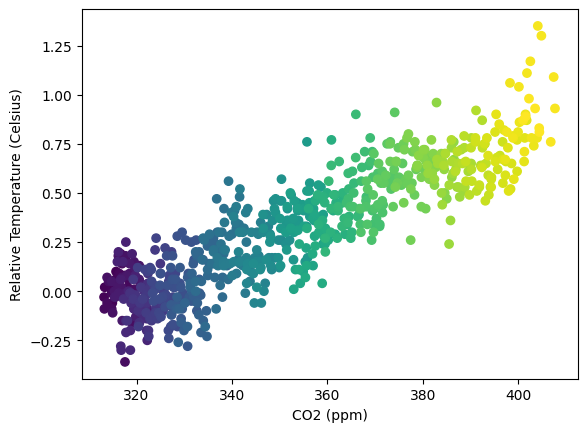

In [114]:
fig, ax = plt.subplots()

ax.scatter(climate_change['co2'], climate_change['relative_temp'], c=climate_change.index)

ax.set_xlabel('CO2 (ppm)')
ax.set_ylabel('Relative Temperature (Celsius)')

plt.show()

# 4.Sharing visualizations with others
Preparing your figures to share with others

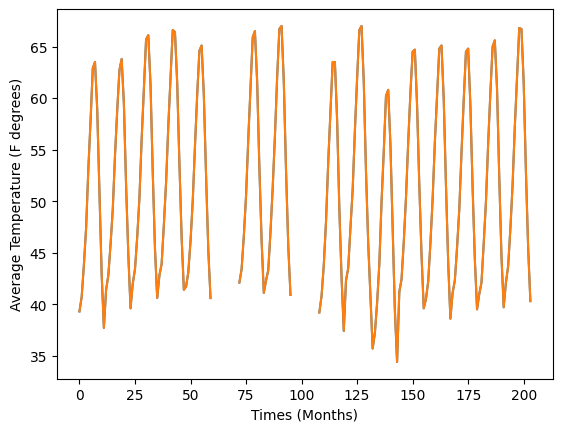

In [115]:
fig, ax = plt.subplots()

ax.plot(seattle_weather.index, seattle_weather['MLY-TAVG-NORMAL'])
ax.plot(austin_weather.index, austin_weather['MLY-TAVG-NORMAL'])

ax.set_xlabel('Times (Months)')
ax.set_ylabel('Average Temperature (F degrees)')

plt.show()

## Saving your visualizations

C:\Users\theki\AppData\Local\Temp\ipykernel_25344\1508302587.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


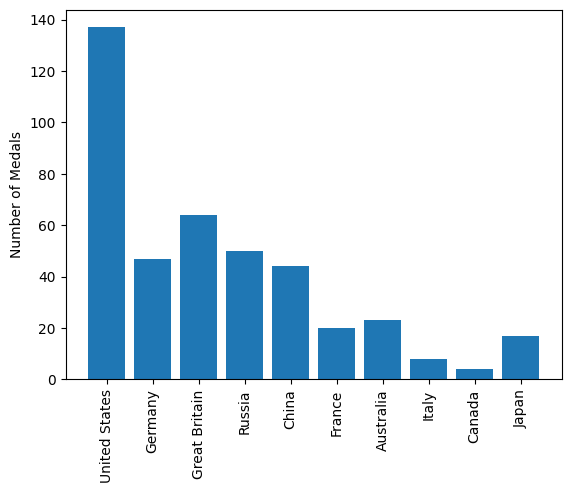

In [116]:
fig, ax = plt.subplots()

ax.bar(medals.index, medals['Gold'])
ax.set_xticklabels(medals.index, rotation=90)
ax.set_ylabel("Number of Medals")

fig.savefig('gold_medals.png')

## Automating figures from data

['Rowing' 'Taekwondo' 'Handball' 'Wrestling' 'Gymnastics' 'Swimming'
 'Basketball' 'Boxing' 'Volleyball' 'Athletics' 'Rugby Sevens' 'Judo'
 'Rhythmic Gymnastics' 'Weightlifting' 'Equestrianism' 'Badminton'
 'Water Polo' 'Football' 'Fencing' 'Shooting' 'Sailing' 'Beach Volleyball'
 'Canoeing' 'Hockey' 'Cycling' 'Tennis' 'Diving' 'Table Tennis'
 'Triathlon' 'Archery' 'Synchronized Swimming' 'Modern Pentathlon'
 'Trampolining' 'Golf']


C:\Users\theki\AppData\Local\Temp\ipykernel_25344\3145671314.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sports, rotation=90)


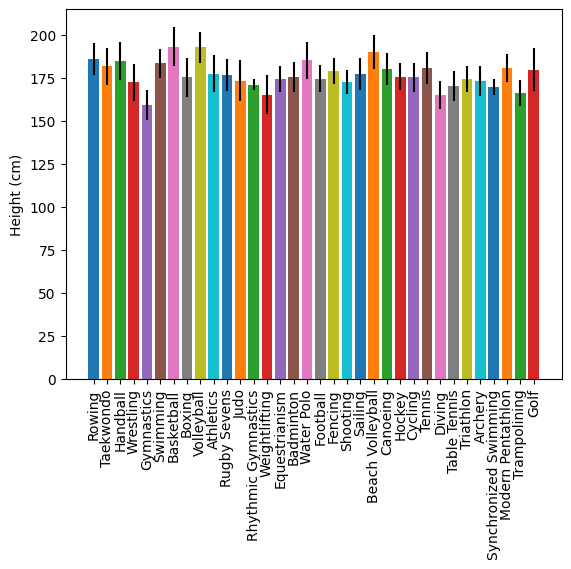

In [119]:
summer_2016_medals = pd.read_csv('../data/summer2016.csv')
sports = summer_2016_medals['Sport'].unique()
print(sports)

fig, ax= plt.subplots()

for sport in sports:
    sport_df = summer_2016_medals[summer_2016_medals['Sport'] == sport]
    ax.bar(sport, sport_df['Height'].mean(), yerr=sport_df['Height'].std())

ax.set_ylabel('Height (cm)')
ax.set_xticklabels(sports, rotation=90)

plt.show()